In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [2]:
data = pd.read_csv("oscar_age_female.csv")

# select rows using regular expression
data[data.Name.str.contains('ss|tt')]

,Index,Year,Age,Name,Movie
3,4,1931,63,Marie Dressler,Min and Bill
6,7,1934,31,Claudette Colbert,It Happened One Night
7,8,1935,27,Bette Davis,Dangerous
10,11,1938,30,Bette Davis,Jezebel
19,20,1947,35,Loretta Young,The Farmer's Daughter
53,54,1981,31,Sissy Spacek,Coal Miner's Daughter
62,63,1990,80,Jessica Tandy,Driving Miss Daisy
67,68,1995,45,Jessica Lange,Blue Sky
86,87,2014,44,Cate Blanchett,Blue Jasmine


In [3]:
# select rows using regular expression
data[data.Movie.str.contains('y$')]

,Index,Year,Age,Name,Movie
5,6,1933,26,Katharine Hepburn,Morning Glory
22,23,1950,29,Judy Holliday,Born Yesterday
25,26,1953,24,Audrey Hepburn,Roman Holiday
62,63,1990,80,Jessica Tandy,Driving Miss Daisy
63,64,1991,42,Kathy Bates,Misery
67,68,1995,45,Jessica Lange,Blue Sky
72,73,2000,25,Hilary Swank,Boys Don't Cry
77,78,2005,30,Hilary Swank,Million Dollar Baby
84,85,2012,62,Meryl Streep,The Iron Lady


In [4]:
# select rows using regular expression
data[data.Movie.str.contains('^[^T]')]

,Index,Year,Age,Name,Movie
0,1,1928,22,Janet Gaynor,"Seventh Heaven,Street Angel and Sunrise: A Son..."
1,2,1929,37,Mary Pickford,Coquette
3,4,1931,63,Marie Dressler,Min and Bill
5,6,1933,26,Katharine Hepburn,Morning Glory
6,7,1934,31,Claudette Colbert,It Happened One Night
7,8,1935,27,Bette Davis,Dangerous
10,11,1938,30,Bette Davis,Jezebel
11,12,1939,26,Vivien Leigh,Gone with the Wind
12,13,1940,29,Ginger Rogers,Kitty Foyle
13,14,1941,24,Joan Fontaine,Suspicion


In [5]:
# select rows using regular expression
data[data.Name.str.contains('[A-Z][a-z][A-Z]')]

,Index,Year,Age,Name,Movie
69,70,1997,39,Frances McDormand,Fargo


In [6]:
# select rows using regular expression
data[data.Name.str.contains('H.*H')]

,Index,Year,Age,Name,Movie
4,5,1932,32,Helen Hayes,The Sin of Madelon Claudet
66,67,1994,36,Holly Hunter,The Piano
70,71,1998,34,Helen Hunt,As Good as It Gets


In [7]:
# select rows using regular expression
data[data.Movie.str.contains(' (.* )+')]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,Index,Year,Age,Name,Movie
0,1,1928,22,Janet Gaynor,"Seventh Heaven,Street Angel and Sunrise: A Son..."
3,4,1931,63,Marie Dressler,Min and Bill
4,5,1932,32,Helen Hayes,The Sin of Madelon Claudet
6,7,1934,31,Claudette Colbert,It Happened One Night
8,9,1936,27,Luise Rainer,The Great Ziegfeld
9,10,1937,28,Luise Rainer,The Good Earth
11,12,1939,26,Vivien Leigh,Gone with the Wind
15,16,1943,25,Jennifer Jones,The Song of Bernadette
18,19,1946,30,Olivia de Havilland,To Each His Own
19,20,1947,35,Loretta Young,The Farmer's Daughter


In [8]:
data2 = pd.read_csv("grades.csv")
tmp = data2.Grade.replace('[+-]','',regex=True)
data2.Grade = tmp
data2

,Lastname,Firstname,SSN,Test1,Test2,Test3,Test4,Final,Grade
0,Alfalfa,Aloysius,123-45-6789,40.0,90.0,100.0,83.0,49.0,D
1,Alfred,University,123-12-1234,41.0,97.0,96.0,97.0,48.0,D
2,Gerty,Gramma,567-89-0123,41.0,80.0,60.0,40.0,44.0,C
3,Android,Electric,087-65-4321,42.0,23.0,36.0,45.0,47.0,B
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,A
5,Rubble,Betty,234-56-7890,44.0,90.0,80.0,90.0,46.0,C
6,Noshow,Cecil,345-67-8901,45.0,11.0,NaN,4.0,43.0,F
7,Buff,Bif,632-79-9939,46.0,20.0,30.0,40.0,50.0,B
8,Airpump,Andrew,223-45-6789,49.0,NaN,90.0,100.0,83.0,A
9,Backus,Jim,143-12-1234,48.0,NaN,97.0,96.0,97.0,A


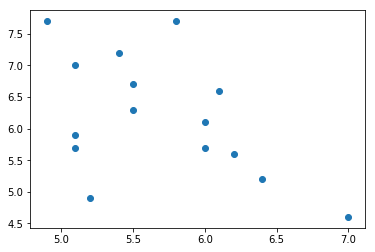

In [11]:
data3 = pd.read_csv("iris.dat",sep=',')
data3s1 = data3.sample(frac=0.1)
data3s2 = data3.sample(frac=0.1)

plt.scatter(data3s1['sepal-length'],data3s2['sepal-length'])

In [12]:
data4 = data3.sample(10)
data4.sort_index()

,sepal-length,sepal-width,petal-length,petal-width,category
23,5.1,3.3,1.7,0.5,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
110,6.5,3.2,5.1,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica


In [13]:
# partition dataframe randomly into two sets
data4s1 = data4.sample(frac=0.5)
# drop rows from first sample
data4s2 = data4.drop(data4s1.index)
data4s1.sort_index()

,sepal-length,sepal-width,petal-length,petal-width,category
23,5.1,3.3,1.7,0.5,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor


In [14]:
data4s2.sort_index()

,sepal-length,sepal-width,petal-length,petal-width,category
110,6.5,3.2,5.1,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica


In [15]:
data3.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# search over which variables are possibly skewed
for i in range(4):
    tmpmean = data3.iloc[:,i].mean()
    tmpmedian = data3.iloc[:,i].median()
    tmpdiff = tmpmean - tmpmedian
    if abs(tmpdiff) > 0.2:
        print(data3.columns[i] + ' has difference of ' + str(tmpdiff) )

petal-length has difference of -0.5913333333333335


(array([ 4., 33., 11.,  2.,  0.,  0.,  1.,  2.,  3.,  5., 12., 14., 12.,
        17.,  6., 12.,  7.,  4.,  2.,  3.]),
 array([1.   , 1.295, 1.59 , 1.885, 2.18 , 2.475, 2.77 , 3.065, 3.36 ,
        3.655, 3.95 , 4.245, 4.54 , 4.835, 5.13 , 5.425, 5.72 , 6.015,
        6.31 , 6.605, 6.9  ]),
 <a list of 20 Patch objects>)

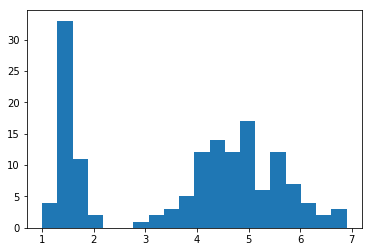

In [17]:
# plot petal-length to see skew
plt.hist(data3['petal-length'],bins=20)

(array([ 4.,  5.,  2., 11., 10., 13.,  7., 13.,  8., 10., 12., 13., 12.,
        10.,  3.,  5.,  4.,  2.,  1.,  5.]),
 array([2.07364414, 2.11049662, 2.14734911, 2.18420159, 2.22105408,
        2.25790657, 2.29475905, 2.33161154, 2.36846403, 2.40531651,
        2.442169  , 2.47902149, 2.51587397, 2.55272646, 2.58957895,
        2.62643143, 2.66328392, 2.70013641, 2.73698889, 2.77384138,
        2.81069386]),
 <a list of 20 Patch objects>)

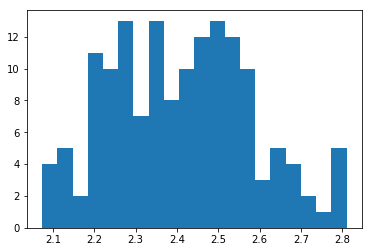

In [19]:
# transform values to reduce skew
data3['scale-pl'] = data3['sepal-length'].transform(func='sqrt')
plt.hist(data3['scale-pl'],bins=20)

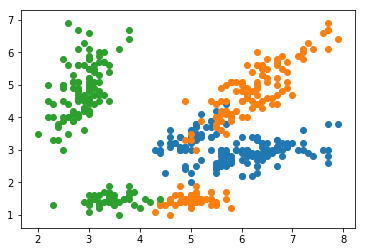

In [20]:
attrs = list(data3.columns)[:3]
fig, ax = plt.subplots()
ax.scatter(data3[attrs[0]],data3[attrs[1]])
ax.scatter(data3[attrs[0]],data3[attrs[2]])
ax.scatter(data3[attrs[1]],data3[attrs[2]])

In [21]:
# get data as numpy matrix
data4 = data3.iloc[:,0:4]
X = data4.values

# normalize values using sklearn
X_scaled = preprocessing.scale(X)
#data4.columns
data4s = pd.DataFrame(X_scaled, index=data4.index, columns=data4.columns)
data4s.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


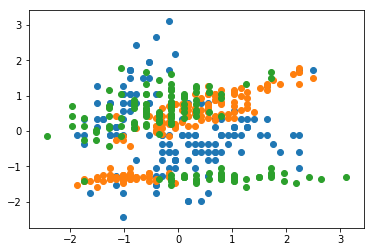

In [22]:
attrs = list(data4s.columns)[:3]
fig, ax = plt.subplots()
ax.scatter(data4s[attrs[0]],data4s[attrs[1]])
ax.scatter(data4s[attrs[0]],data4s[attrs[2]])
ax.scatter(data4s[attrs[1]],data4s[attrs[2]])

In [23]:
data5s = data4s.sample(frac=0.10)

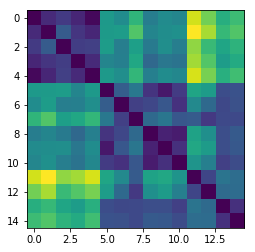

In [24]:
# pairwise distances among sample of data
#dists = euclidean_distances(data5s.values)
dists = euclidean_distances(data5s.sort_index().values)
plt.imshow(dists)

In [25]:
# stratified sample by category
data6s = None
for cat, cat_data in data3.groupby('category'):
    tmpSample = cat_data.sample(frac=0.10)
    if data6s is None:
        data6s = tmpSample
    else:
        data6s = data6s.append(tmpSample)
data6s.describe()

,sepal-length,sepal-width,petal-length,petal-width,scale-pl
count,15.000000,15.000000,15.000000,15.00000,15.000000
mean,5.840000,2.973333,3.640000,1.20000,2.410609
std,0.833067,0.351460,1.706207,0.78011,0.176164
min,4.400000,2.300000,1.300000,0.20000,2.097618
25%,5.050000,2.800000,1.450000,0.30000,2.247193
50%,6.200000,3.000000,4.600000,1.40000,2.489980
75%,6.450000,3.250000,4.850000,1.80000,2.539666
max,6.900000,3.500000,5.400000,2.30000,2.626785


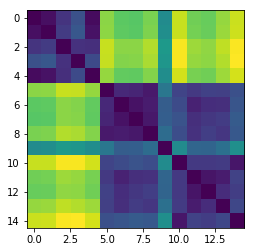

In [26]:
dists = euclidean_distances(data6s.iloc[:,0:4].sort_index().values)
plt.imshow(dists)